## To Create your own dataset using WebScraping and perform Data Analysis on it.

- Website chosen : Amazon
- Product : Mixer Grinder added to website in the last 30 days

1.	Using beautifulsoup scrape the Amazon page
2.	Store the data in a pandas dataframe
3.	Extract features in separate columns
4.	Take care of data types, convert numerical data types to int or float
5.	Handle duplicate and missing values
6.	Perform end to end EDA and mention the observations in markdown cells


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

import time

import warnings
warnings.filterwarnings('ignore')

In [84]:
URL="https://www.amazon.in/s?rh=n%3A21488095031&fs=true&ref=lp_21488095031_sar"
page = requests.get(URL)
page.status_code

200

In [85]:
page.content

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="preconnect" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://m.media-amazon.com" crossorigin>\n<link rel="preconnect" href="https://m.media-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://completion.amazon.com" crossorigin>\n<link rel="preconnect" href="https://completion.amazon.com" crossorigin>\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n\n<!-- sp:end-feature:csm:head-open-p

In [86]:
soup1=BeautifulSoup(page.content,'html.parser')
soup=BeautifulSoup(soup1.prettify(),'html.parser')
print(soup)

<!DOCTYPE html>

<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
<!-- sp:feature:head-start -->
<head>
<script>
   var aPageStart = (new Date()).getTime();
  </script>
<meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<!-- sp:end-feature:csm

In [54]:
titles = []
prices = []
ratings = []
number_ratings = []
MRP= []

for x in range (1,23):
    start_time = time.time()
    
    URL = "https://www.amazon.in/s?rh=n%3A21488095031&fs=true&ref=lp_21488095031_sar&page={}".format(x)
    page = requests.get(URL)
    soup = BeautifulSoup(page.content,'html.parser')
    
    product_details = soup.find_all('div', class_ ="sg-col-inner")
    
    for product in product_details:
        
        name=product.find('h2',class_="a-size-mini a-spacing-none a-color-base s-line-clamp-4")
        if name is None:
            titles.append(np.nan)
        else:
            titles.append(name.text)

        # price
        price = product.find('span',class_="a-price-whole")
        if price is None:
            prices.append(np.nan)
        else:
            prices.append(price.text)

        # rating
        rating = product.find('i',class_="a-icon a-icon-star-small a-star-small-4 aok-align-bottom")
        if rating is None:
            ratings.append(np.nan)
        else:
            ratings.append(rating.text)
        
        no_of_rating = product.find('span',class_="a-size-base s-underline-text")
        if no_of_rating is None:
            number_ratings.append(np.nan)
        else:
            number_ratings.append(no_of_rating.text)

        mr_p = product.find("span",class_="a-price a-text-price")
        if mr_p is None:
            MRP.append(np.nan)
        else:
            MRP.append(mr_p.text)  
            
    end_time = time.time()
    print('Page {} completed in {} seconds'.format(x, end_time - start_time))

Page 1 completed in 0.5140717029571533 seconds
Page 2 completed in 0.6028313636779785 seconds
Page 3 completed in 0.7193195819854736 seconds
Page 4 completed in 0.619534969329834 seconds
Page 5 completed in 1.5760188102722168 seconds
Page 6 completed in 0.5728724002838135 seconds
Page 7 completed in 0.6129107475280762 seconds
Page 8 completed in 1.9826023578643799 seconds
Page 9 completed in 0.7756614685058594 seconds
Page 10 completed in 0.7201502323150635 seconds
Page 11 completed in 0.4975707530975342 seconds
Page 12 completed in 0.515657901763916 seconds
Page 13 completed in 0.5032835006713867 seconds
Page 14 completed in 0.7138345241546631 seconds
Page 15 completed in 0.6175632476806641 seconds
Page 16 completed in 0.5189836025238037 seconds
Page 17 completed in 1.6353044509887695 seconds
Page 18 completed in 0.6101350784301758 seconds
Page 19 completed in 1.3379285335540771 seconds
Page 20 completed in 2.3530092239379883 seconds
Page 21 completed in 0.6031851768493652 seconds
Pag

In [55]:
print(len(titles))
print(len(prices))
print(len(ratings))
print(len(number_ratings))
print(len(MRP))

87
87
87
87
87


In [56]:
data = {'Product_name'     : titles,
        'MRP'              : MRP,
        'Price'           : prices,
        'Rating'           : ratings,
        'No_of_Ratings'    : number_ratings}

df = pd.DataFrame(data)
df.head(10)

,Product_name,MRP,Price,Rating,No_of_Ratings
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,Crompton QUESTA ROYALX 750-Watt Mixer Grinder ...,"₹6,400₹6,400","2,999",3.9 out of 5 stars,7
3,Crompton QUESTA ROYALX 750-Watt Mixer Grinder ...,"₹6,400₹6,400","2,999",NaN,7
4,Longway Super Dlx Mixer Grinder (Powerful Moto...,"₹3,299₹3,299","1,299",3.9 out of 5 stars,19
5,Lifestyle Enterprise Mixer Grinder Chutney Jar...,₹499₹499,289,NaN,4
6,Bajaj Majesty DX 1000W Mixer Grinder and Dry I...,"₹4,950₹4,950","2,900",4.1 out of 5 stars,110
7,Havells Klassic 750 watts 3 Jar Mixer Grinder ...,"₹7,995₹7,995","3,200",3.9 out of 5 stars,225
8,"Preethi Eco Plus Mixer Grinder (550 Watt, 3 Ja...","₹6,629₹6,629","5,920",4.1 out of 5 stars,"1,461"
9,Preethi Super Extractor MGA-508 1.5 Ltr Jar (W...,NaN,"1,193",3.8 out of 5 stars,378


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product_name   75 non-null     object
 1   MRP            70 non-null     object
 2   Price          73 non-null     object
 3   Rating         37 non-null     object
 4   No_of_Ratings  66 non-null     object
dtypes: object(5)
memory usage: 3.5+ KB


In [58]:
df.isnull().sum()

Product_name     12
MRP              17
Price            14
Rating           50
No_of_Ratings    21
dtype: int64

In [59]:
df.duplicated().sum()

12

In [60]:
df.drop_duplicates(inplace=True)

In [61]:
df.drop(0, inplace = True, axis = 0)
df

,Product_name,MRP,Price,Rating,No_of_Ratings
2,Crompton QUESTA ROYALX 750-Watt Mixer Grinder ...,"₹6,400₹6,400","2,999",3.9 out of 5 stars,7
3,Crompton QUESTA ROYALX 750-Watt Mixer Grinder ...,"₹6,400₹6,400","2,999",NaN,7
4,Longway Super Dlx Mixer Grinder (Powerful Moto...,"₹3,299₹3,299","1,299",3.9 out of 5 stars,19
5,Lifestyle Enterprise Mixer Grinder Chutney Jar...,₹499₹499,289,NaN,4
6,Bajaj Majesty DX 1000W Mixer Grinder and Dry I...,"₹4,950₹4,950","2,900",4.1 out of 5 stars,110
...,...,...,...,...,...
80,Greenchef Melon 600 Watts Mixer Grinder with 3...,"₹2,999₹2,999","1,769",NaN,4
81,QemiQ Retail® -Mixer Grinder-Motor Coupler +Ja...,₹499₹499,489,NaN,NaN
82,Solidaire 550-Watt Mixer Grinder with 3 Jars (...,"₹2,800₹2,800","2,260",3.9 out of 5 stars,"2,460"
83,HAKURA Stainless Steel Spice Mill Flour Electr...,"₹10,250₹10,250","8,900",NaN,6


In [62]:
brand_regex = re.compile(r'\w+-\w+|^\w+')
df['Brand'] = df.Product_name.apply(lambda s : brand_regex.findall(s)[0])
df.head(10)

,Product_name,MRP,Price,Rating,No_of_Ratings,Brand
2,Crompton QUESTA ROYALX 750-Watt Mixer Grinder ...,"₹6,400₹6,400","2,999",3.9 out of 5 stars,7,Crompton
3,Crompton QUESTA ROYALX 750-Watt Mixer Grinder ...,"₹6,400₹6,400","2,999",NaN,7,Crompton
4,Longway Super Dlx Mixer Grinder (Powerful Moto...,"₹3,299₹3,299","1,299",3.9 out of 5 stars,19,Longway
5,Lifestyle Enterprise Mixer Grinder Chutney Jar...,₹499₹499,289,NaN,4,Lifestyle
6,Bajaj Majesty DX 1000W Mixer Grinder and Dry I...,"₹4,950₹4,950","2,900",4.1 out of 5 stars,110,Bajaj
7,Havells Klassic 750 watts 3 Jar Mixer Grinder ...,"₹7,995₹7,995","3,200",3.9 out of 5 stars,225,Havells
8,"Preethi Eco Plus Mixer Grinder (550 Watt, 3 Ja...","₹6,629₹6,629","5,920",4.1 out of 5 stars,"1,461",Preethi
9,Preethi Super Extractor MGA-508 1.5 Ltr Jar (W...,NaN,"1,193",3.8 out of 5 stars,378,Preethi
10,MAYUMI® GLS EXPERTS 750W Mixer Grinder | PYRAM...,"₹3,495₹3,495","1,095",NaN,3,MAYUMI
11,"Butterfly Magnum 1.2 Hp Mixer Grinder 4 Jar, 9...","₹8,299₹8,299","5,699",NaN,40,Butterfly


In [63]:
df

,Product_name,MRP,Price,Rating,No_of_Ratings,Brand
2,Crompton QUESTA ROYALX 750-Watt Mixer Grinder ...,"₹6,400₹6,400","2,999",3.9 out of 5 stars,7,Crompton
3,Crompton QUESTA ROYALX 750-Watt Mixer Grinder ...,"₹6,400₹6,400","2,999",NaN,7,Crompton
4,Longway Super Dlx Mixer Grinder (Powerful Moto...,"₹3,299₹3,299","1,299",3.9 out of 5 stars,19,Longway
5,Lifestyle Enterprise Mixer Grinder Chutney Jar...,₹499₹499,289,NaN,4,Lifestyle
6,Bajaj Majesty DX 1000W Mixer Grinder and Dry I...,"₹4,950₹4,950","2,900",4.1 out of 5 stars,110,Bajaj
...,...,...,...,...,...,...
80,Greenchef Melon 600 Watts Mixer Grinder with 3...,"₹2,999₹2,999","1,769",NaN,4,Greenchef
81,QemiQ Retail® -Mixer Grinder-Motor Coupler +Ja...,₹499₹499,489,NaN,NaN,QemiQ
82,Solidaire 550-Watt Mixer Grinder with 3 Jars (...,"₹2,800₹2,800","2,260",3.9 out of 5 stars,"2,460",Solidaire
83,HAKURA Stainless Steel Spice Mill Flour Electr...,"₹10,250₹10,250","8,900",NaN,6,HAKURA


In [64]:

def get_ratings(text):
    if text is np.nan:
        return 0
    else:
        rating_regex = re.compile(r'(\d\.\d)')
        ratings = rating_regex.findall(text)[0]
        #ratings = int(ratings[0].strip().replace(',',''))
        return ratings
    
df['Rating'] = df.Rating.apply(get_ratings)

In [65]:
df

,Product_name,MRP,Price,Rating,No_of_Ratings,Brand
2,Crompton QUESTA ROYALX 750-Watt Mixer Grinder ...,"₹6,400₹6,400","2,999",3.9,7,Crompton
3,Crompton QUESTA ROYALX 750-Watt Mixer Grinder ...,"₹6,400₹6,400","2,999",0,7,Crompton
4,Longway Super Dlx Mixer Grinder (Powerful Moto...,"₹3,299₹3,299","1,299",3.9,19,Longway
5,Lifestyle Enterprise Mixer Grinder Chutney Jar...,₹499₹499,289,0,4,Lifestyle
6,Bajaj Majesty DX 1000W Mixer Grinder and Dry I...,"₹4,950₹4,950","2,900",4.1,110,Bajaj
...,...,...,...,...,...,...
80,Greenchef Melon 600 Watts Mixer Grinder with 3...,"₹2,999₹2,999","1,769",0,4,Greenchef
81,QemiQ Retail® -Mixer Grinder-Motor Coupler +Ja...,₹499₹499,489,0,NaN,QemiQ
82,Solidaire 550-Watt Mixer Grinder with 3 Jars (...,"₹2,800₹2,800","2,260",3.9,"2,460",Solidaire
83,HAKURA Stainless Steel Spice Mill Flour Electr...,"₹10,250₹10,250","8,900",0,6,HAKURA


In [66]:
df["No_of_Ratings"].replace(np.nan,0,inplace=True)

In [67]:
df["No_of_Ratings"] = df["No_of_Ratings"].str.replace(',','').astype(float)

In [68]:
df["Price"] = df["Price"].str.replace(',','').astype(float)

In [69]:
def get_mrp(text):
    if text is np.nan:
        return 0
    else:
        mrp_regex = re.compile(r'\d+,\d+|\d+')
        mrpfind = mrp_regex.findall(text)[0]
        mrp = int(mrpfind.strip().replace(',',''))
        return mrp
    
df['MRP'] = df.MRP.apply(get_mrp)
df.head(10)

,Product_name,MRP,Price,Rating,No_of_Ratings,Brand
2,Crompton QUESTA ROYALX 750-Watt Mixer Grinder ...,6400,2999.0,3.9,7.0,Crompton
3,Crompton QUESTA ROYALX 750-Watt Mixer Grinder ...,6400,2999.0,0,7.0,Crompton
4,Longway Super Dlx Mixer Grinder (Powerful Moto...,3299,1299.0,3.9,19.0,Longway
5,Lifestyle Enterprise Mixer Grinder Chutney Jar...,499,289.0,0,4.0,Lifestyle
6,Bajaj Majesty DX 1000W Mixer Grinder and Dry I...,4950,2900.0,4.1,110.0,Bajaj
7,Havells Klassic 750 watts 3 Jar Mixer Grinder ...,7995,3200.0,3.9,225.0,Havells
8,"Preethi Eco Plus Mixer Grinder (550 Watt, 3 Ja...",6629,5920.0,4.1,1461.0,Preethi
9,Preethi Super Extractor MGA-508 1.5 Ltr Jar (W...,0,1193.0,3.8,378.0,Preethi
10,MAYUMI® GLS EXPERTS 750W Mixer Grinder | PYRAM...,3495,1095.0,0,3.0,MAYUMI
11,"Butterfly Magnum 1.2 Hp Mixer Grinder 4 Jar, 9...",8299,5699.0,0,40.0,Butterfly


In [70]:
columns = ['Brand','Product_name','MRP','Price','Rating','No_of_Ratings']
df=df[columns]
df.head(10)

,Brand,Product_name,MRP,Price,Rating,No_of_Ratings
2,Crompton,Crompton QUESTA ROYALX 750-Watt Mixer Grinder ...,6400,2999.0,3.9,7.0
3,Crompton,Crompton QUESTA ROYALX 750-Watt Mixer Grinder ...,6400,2999.0,0,7.0
4,Longway,Longway Super Dlx Mixer Grinder (Powerful Moto...,3299,1299.0,3.9,19.0
5,Lifestyle,Lifestyle Enterprise Mixer Grinder Chutney Jar...,499,289.0,0,4.0
6,Bajaj,Bajaj Majesty DX 1000W Mixer Grinder and Dry I...,4950,2900.0,4.1,110.0
7,Havells,Havells Klassic 750 watts 3 Jar Mixer Grinder ...,7995,3200.0,3.9,225.0
8,Preethi,"Preethi Eco Plus Mixer Grinder (550 Watt, 3 Ja...",6629,5920.0,4.1,1461.0
9,Preethi,Preethi Super Extractor MGA-508 1.5 Ltr Jar (W...,0,1193.0,3.8,378.0
10,MAYUMI,MAYUMI® GLS EXPERTS 750W Mixer Grinder | PYRAM...,3495,1095.0,0,3.0
11,Butterfly,"Butterfly Magnum 1.2 Hp Mixer Grinder 4 Jar, 9...",8299,5699.0,0,40.0


## ============================================================================

### Analysis on Brands

In [71]:
df["Product_name"].count()

74

In [72]:
df["Brand"].value_counts().head(10)

Preethi      8
QemiQ        6
Bosch        4
Butterfly    4
Vidiem       4
Bajaj        4
Panasonic    4
Crompton     3
Lifelong     2
Balzano      2
Name: Brand, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Brand'>

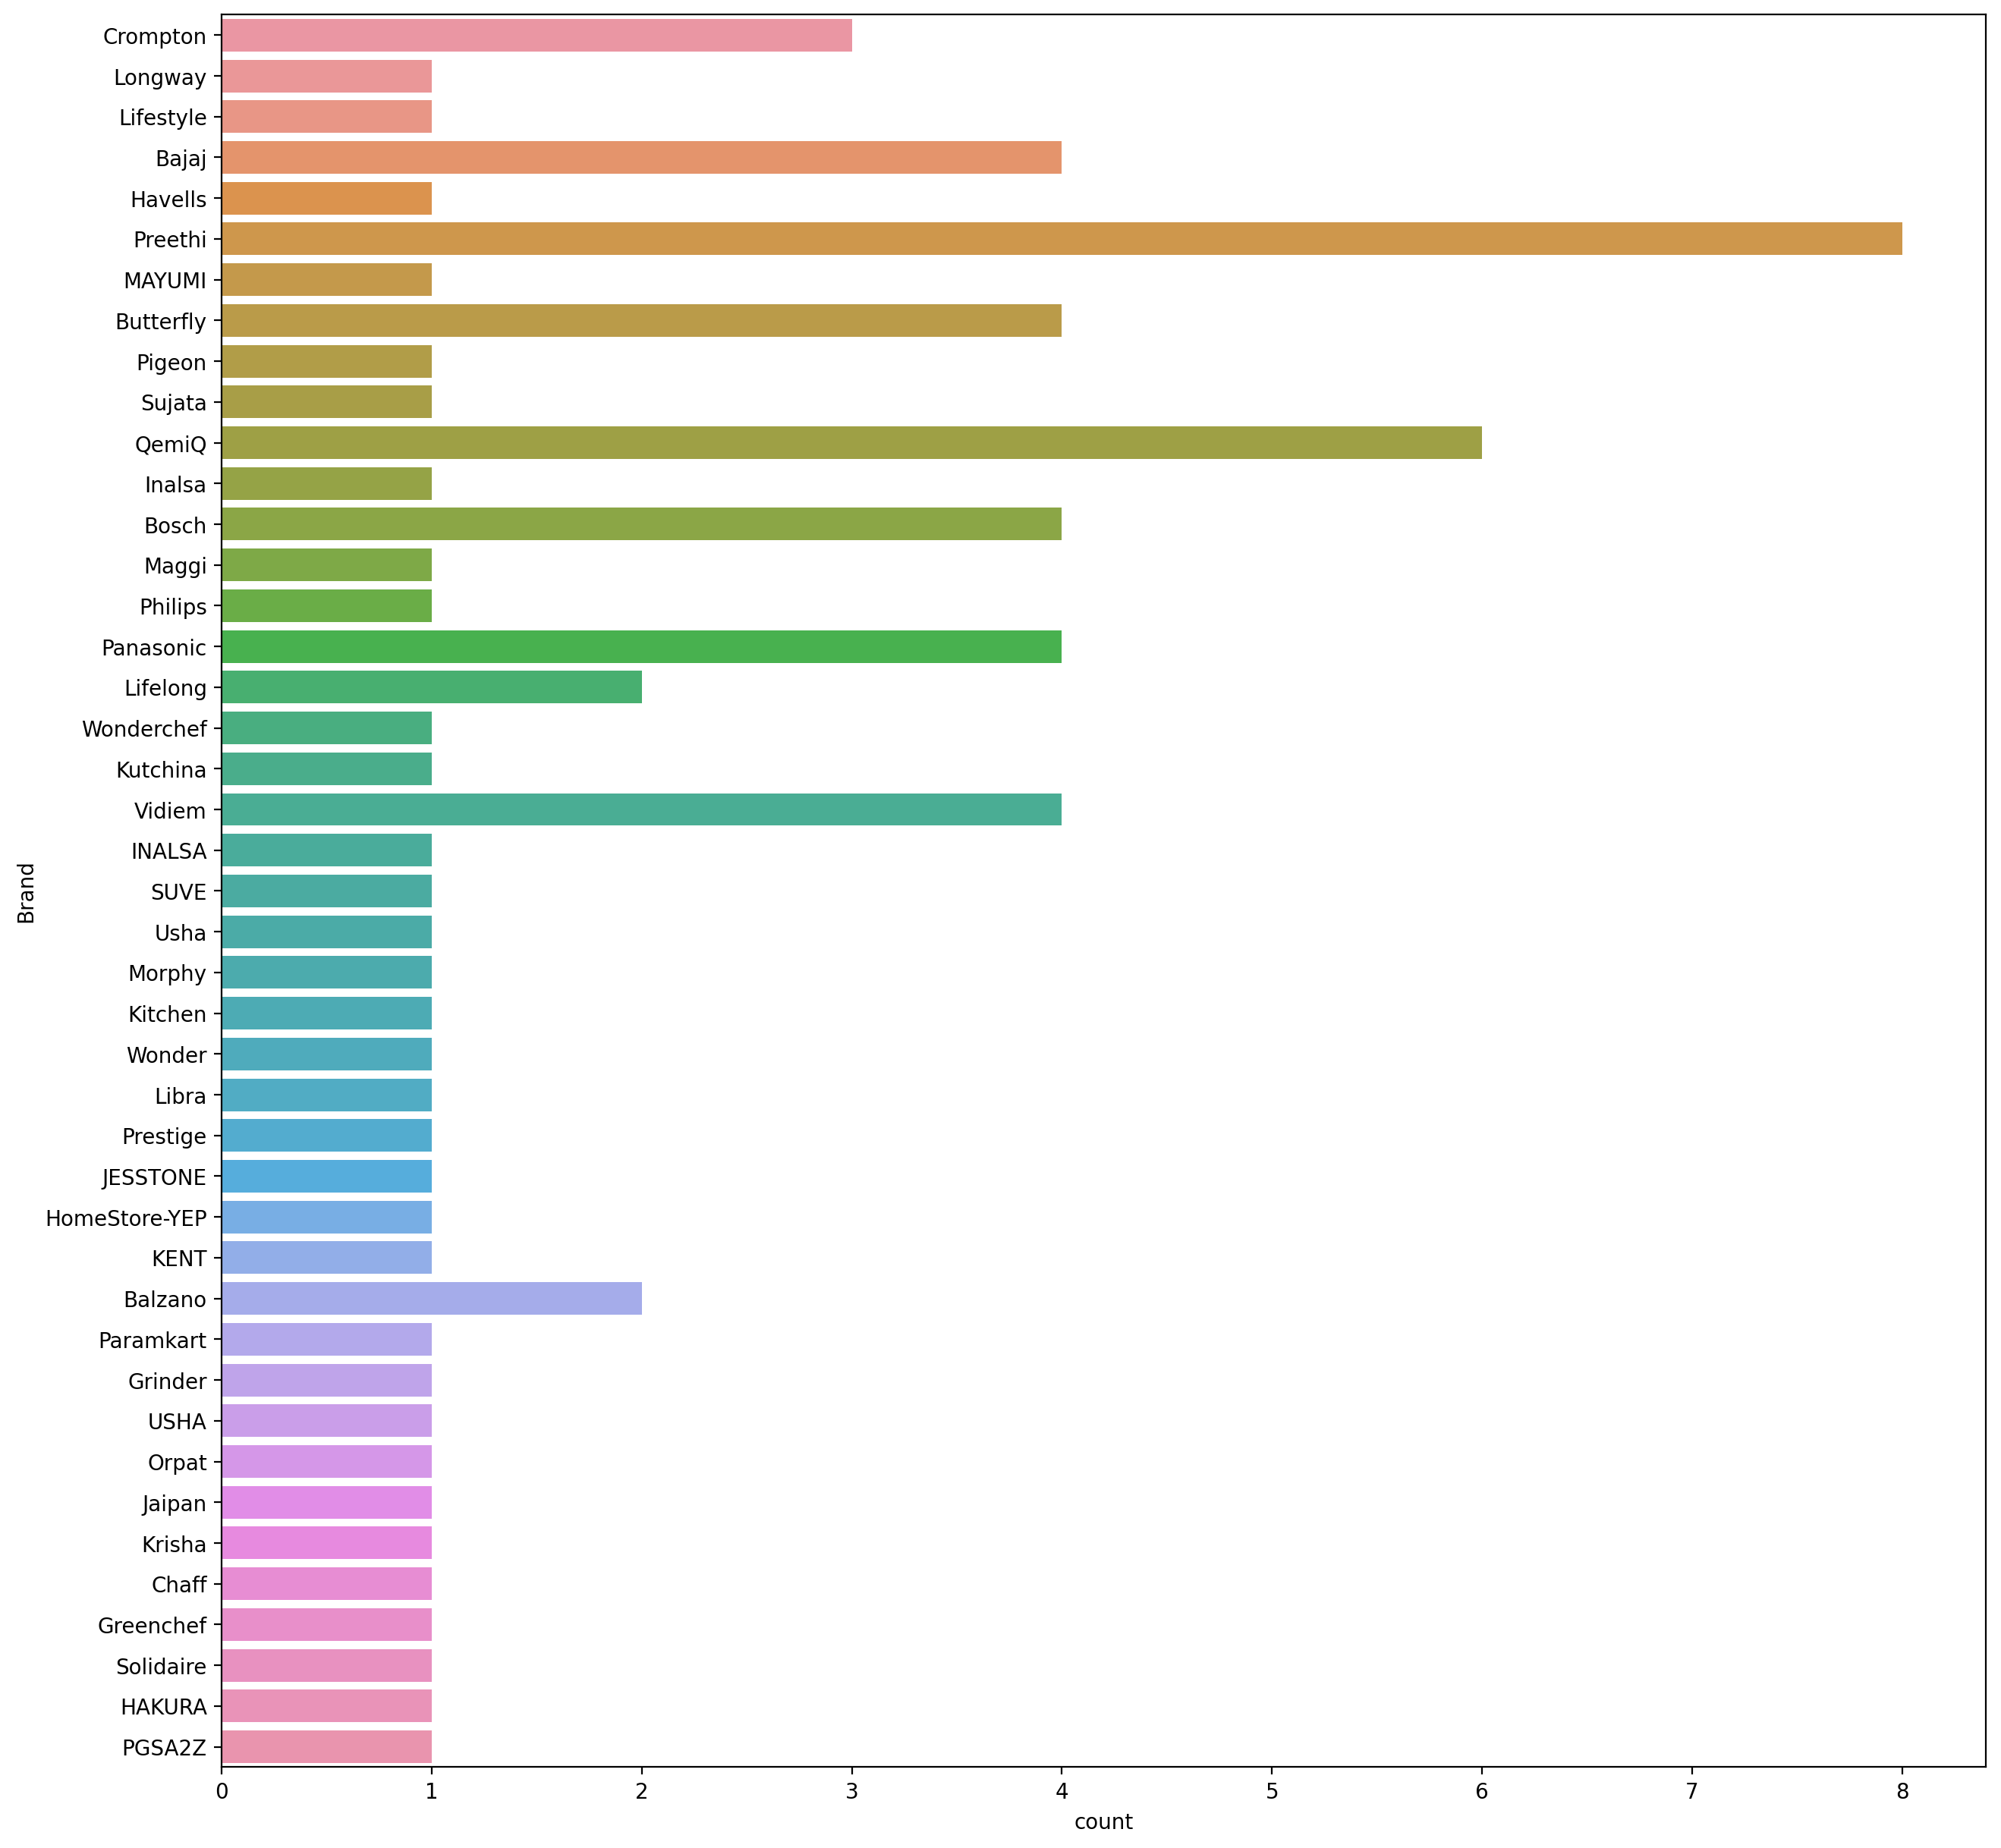

In [73]:
plt.figure(figsize=(15,15),dpi=200)
sns.countplot(y=df["Brand"])

## ==========================================================================

### Report on Brands

- There are 124 new Mixer Grinder  were added on to Amazon website by 69 brands in the past 30 days.
- Preethi is the brand which added highest number of new products (8 products), followed by Prestige (6 products) and Sujata  
  Butterfly, Vidiem and Maharaja with 5 numbers each.

## ==========================================================================

### Analysis on products

In [74]:
df["Discount"]=((df.MRP-df.Price)/df.MRP)*100
df

,Brand,Product_name,MRP,Price,Rating,No_of_Ratings,Discount
2,Crompton,Crompton QUESTA ROYALX 750-Watt Mixer Grinder ...,6400,2999.0,3.9,7.0,53.140625
3,Crompton,Crompton QUESTA ROYALX 750-Watt Mixer Grinder ...,6400,2999.0,0,7.0,53.140625
4,Longway,Longway Super Dlx Mixer Grinder (Powerful Moto...,3299,1299.0,3.9,19.0,60.624432
5,Lifestyle,Lifestyle Enterprise Mixer Grinder Chutney Jar...,499,289.0,0,4.0,42.084168
6,Bajaj,Bajaj Majesty DX 1000W Mixer Grinder and Dry I...,4950,2900.0,4.1,110.0,41.414141
...,...,...,...,...,...,...,...
80,Greenchef,Greenchef Melon 600 Watts Mixer Grinder with 3...,2999,1769.0,0,4.0,41.013671
81,QemiQ,QemiQ Retail® -Mixer Grinder-Motor Coupler +Ja...,499,489.0,0,NaN,2.004008
82,Solidaire,Solidaire 550-Watt Mixer Grinder with 3 Jars (...,2800,2260.0,3.9,2460.0,19.285714
83,HAKURA,HAKURA Stainless Steel Spice Mill Flour Electr...,10250,8900.0,0,6.0,13.170732


In [75]:
df.sort_values(by = "Discount",ascending=False).head(10)

,Brand,Product_name,MRP,Price,Rating,No_of_Ratings,Discount
10,MAYUMI,MAYUMI® GLS EXPERTS 750W Mixer Grinder | PYRAM...,3495,1095.0,0,3.0,68.669528
54,HomeStore-YEP,HomeStore-YEP Printed Mixer Grinder Cover for ...,899,289.0,0,NaN,67.853170
46,Libra,Libra 2000 watt commercial heavy duty mixer gr...,12999,4999.0,0,213.0,61.543196
4,Longway,Longway Super Dlx Mixer Grinder (Powerful Moto...,3299,1299.0,3.9,19.0,60.624432
36,SUVE,SUVE 3 Layer Stitching Material Table Top All ...,950,375.0,0,192.0,60.526316
7,Havells,Havells Klassic 750 watts 3 Jar Mixer Grinder ...,7995,3200.0,3.9,225.0,59.974984
65,Lifelong,Lifelong 500W Mixer Grinder and Gas Stove Comb...,8545,3444.0,3.8,72.0,59.695728
35,INALSA,INALSA Mixer Grinder Polo 550 W | 2 Stainless ...,3695,1505.0,3.8,1699.0,59.269283
23,Lifelong,"Lifelong LLCMB03 500 W Mixer Grinder (White, 3...",3399,1408.0,3.8,39.0,58.576052
84,PGSA2Z,PGSA2Z Mixer Grinder over Load Protector Switc...,599,250.0,0,6.0,58.263773


In [76]:
high_discount=df[["Brand","Product_name","Discount"]][df["Discount"]>50].sort_values(by="Discount",ascending=False)
high_discount

,Brand,Product_name,Discount
10,MAYUMI,MAYUMI® GLS EXPERTS 750W Mixer Grinder | PYRAM...,68.669528
54,HomeStore-YEP,HomeStore-YEP Printed Mixer Grinder Cover for ...,67.853170
46,Libra,Libra 2000 watt commercial heavy duty mixer gr...,61.543196
4,Longway,Longway Super Dlx Mixer Grinder (Powerful Moto...,60.624432
36,SUVE,SUVE 3 Layer Stitching Material Table Top All ...,60.526316
7,Havells,Havells Klassic 750 watts 3 Jar Mixer Grinder ...,59.974984
65,Lifelong,Lifelong 500W Mixer Grinder and Gas Stove Comb...,59.695728
35,INALSA,INALSA Mixer Grinder Polo 550 W | 2 Stainless ...,59.269283
23,Lifelong,"Lifelong LLCMB03 500 W Mixer Grinder (White, 3...",58.576052
84,PGSA2Z,PGSA2Z Mixer Grinder over Load Protector Switc...,58.263773


In [77]:
high_discount["Brand"].value_counts()

Lifelong         2
Crompton         2
MAYUMI           1
HomeStore-YEP    1
Libra            1
Longway          1
SUVE             1
Havells          1
INALSA           1
PGSA2Z           1
Morphy           1
Inalsa           1
Name: Brand, dtype: int64

In [78]:
high_price=df.sort_values(by="Price",ascending=False).head(10)
high_price


,Brand,Product_name,MRP,Price,Rating,No_of_Ratings,Discount
79,Chaff,Chaff Cutter Cum Pulverizer Model Vidhata JF 5D,69999,68999.0,0,NaN,1.428592
45,Preethi,"Preethi Zodiac 2.0 MG-255 Mixer Grinder, 1000 ...",18545,14225.0,4.0,136.0,23.294689
72,Vidiem,Vidiem ADC Mixer Grinder 579A | Mixer grinder ...,14537,10550.0,0,NaN,27.426567
83,HAKURA,HAKURA Stainless Steel Spice Mill Flour Electr...,10250,8900.0,0,6.0,13.170732
22,Panasonic,Panasonic MX-AE 475 Red 750 Watts Monster Supe...,11695,8700.0,0,17.0,25.609235
49,Preethi,"Preethi Zodiac Glitter MG 264, 750 Watts, 5 Ja...",10985,8699.0,4.0,912.0,20.810196
48,Vidiem,Vidiem ADC Mixer Grinder 612 Evo(ONL) | 750 Wa...,13690,8590.0,4.2,182.0,37.253470
68,Vidiem,Vidiem Mixer Grinder 567 A Jumbo Mix Pro (Blac...,11848,7470.0,3.8,45.0,36.951384
25,Bosch,Bosch TrueMixx Pro Mixer Grinder MGM8842DIN 10...,10810,6949.0,3.9,16.0,35.716929
40,Bosch,Bosch TrueMixx Style Mixer Grinder MGM6642DIN ...,10050,5940.0,0,11.0,40.895522


In [79]:
df["Rating"] = df["Rating"].astype(float)
high_rating=df.sort_values(by="Rating",ascending=False).head(10)
high_rating

,Brand,Product_name,MRP,Price,Rating,No_of_Ratings,Discount
44,Panasonic,"Panasonic MX-AV325CB 600W Mixer Grinder, Blue",8495,5789.0,4.2,150.0,31.854032
48,Vidiem,Vidiem ADC Mixer Grinder 612 Evo(ONL) | 750 Wa...,13690,8590.0,4.2,182.0,37.253470
21,Philips,Philips Viva Collection HL7701/00 Mixer Grinde...,6995,5425.0,4.2,3842.0,22.444603
47,Prestige,Prestige Delight Plus 750 W Mixer Grinder (Wit...,7595,4870.0,4.2,2813.0,35.878868
34,Vidiem,Vidiem Mixer Grinder 581 A Vision Plus (Multic...,6990,4490.0,4.1,650.0,35.765379
39,Morphy,Morphy Richards Aero Plus 500-Watt Mixer Grind...,5250,2338.0,4.1,853.0,55.466667
20,Butterfly,Butterfly Jet Elite 750W Mixer Grinder and Veg...,6709,3544.0,4.1,570.0,47.175436
18,Maggi,Maggi RIO All in one 3G Food Processor Attachm...,2795,2144.0,4.1,541.0,23.291592
52,Bajaj,Bajaj GX 8 750 DLX 750W Mixer Grinder with 3 J...,5495,3350.0,4.1,482.0,39.035487
67,Preethi,"Preethi Aries MG 216 mixer grinder 750 watt, G...",7529,5914.0,4.1,174.0,21.450392


In [80]:
df["Rating"]=df["Rating"].replace(0,(round(df["Rating"].mean(),1)))
df

,Brand,Product_name,MRP,Price,Rating,No_of_Ratings,Discount
2,Crompton,Crompton QUESTA ROYALX 750-Watt Mixer Grinder ...,6400,2999.0,3.9,7.0,53.140625
3,Crompton,Crompton QUESTA ROYALX 750-Watt Mixer Grinder ...,6400,2999.0,1.9,7.0,53.140625
4,Longway,Longway Super Dlx Mixer Grinder (Powerful Moto...,3299,1299.0,3.9,19.0,60.624432
5,Lifestyle,Lifestyle Enterprise Mixer Grinder Chutney Jar...,499,289.0,1.9,4.0,42.084168
6,Bajaj,Bajaj Majesty DX 1000W Mixer Grinder and Dry I...,4950,2900.0,4.1,110.0,41.414141
...,...,...,...,...,...,...,...
80,Greenchef,Greenchef Melon 600 Watts Mixer Grinder with 3...,2999,1769.0,1.9,4.0,41.013671
81,QemiQ,QemiQ Retail® -Mixer Grinder-Motor Coupler +Ja...,499,489.0,1.9,NaN,2.004008
82,Solidaire,Solidaire 550-Watt Mixer Grinder with 3 Jars (...,2800,2260.0,3.9,2460.0,19.285714
83,HAKURA,HAKURA Stainless Steel Spice Mill Flour Electr...,10250,8900.0,1.9,6.0,13.170732


In [81]:
high_rating["Brand"].value_counts()

Vidiem       2
Panasonic    1
Philips      1
Prestige     1
Morphy       1
Butterfly    1
Maggi        1
Bajaj        1
Preethi      1
Name: Brand, dtype: int64

In [82]:
high_numrating=df.sort_values(by="No_of_Ratings",ascending=False).head(10)
high_numrating

,Brand,Product_name,MRP,Price,Rating,No_of_Ratings,Discount
33,Bajaj,"Bajaj Classic Mixer Grinder, 750W, 3 Jars (Whi...",5599,3780.0,4.1,5663.0,32.487944
21,Philips,Philips Viva Collection HL7701/00 Mixer Grinde...,6995,5425.0,4.2,3842.0,22.444603
47,Prestige,Prestige Delight Plus 750 W Mixer Grinder (Wit...,7595,4870.0,4.2,2813.0,35.878868
82,Solidaire,Solidaire 550-Watt Mixer Grinder with 3 Jars (...,2800,2260.0,3.9,2460.0,19.285714
35,INALSA,INALSA Mixer Grinder Polo 550 W | 2 Stainless ...,3695,1505.0,3.8,1699.0,59.269283
24,Wonderchef,Wonderchef Platinum 750W Mixer Grinder | 4 Sta...,6000,3499.0,1.9,1557.0,41.683333
8,Preethi,"Preethi Eco Plus Mixer Grinder (550 Watt, 3 Ja...",6629,5920.0,4.1,1461.0,10.695429
49,Preethi,"Preethi Zodiac Glitter MG 264, 750 Watts, 5 Ja...",10985,8699.0,4.0,912.0,20.810196
39,Morphy,Morphy Richards Aero Plus 500-Watt Mixer Grind...,5250,2338.0,4.1,853.0,55.466667
19,Preethi,"Preethi Peppy MG-245 mixer grinder, 750 watt, ...",5495,3690.0,4.0,851.0,32.848044


<AxesSubplot:title={'center':'Products which received highest number of ratings'}, xlabel='No_of_Ratings', ylabel='Product_name'>

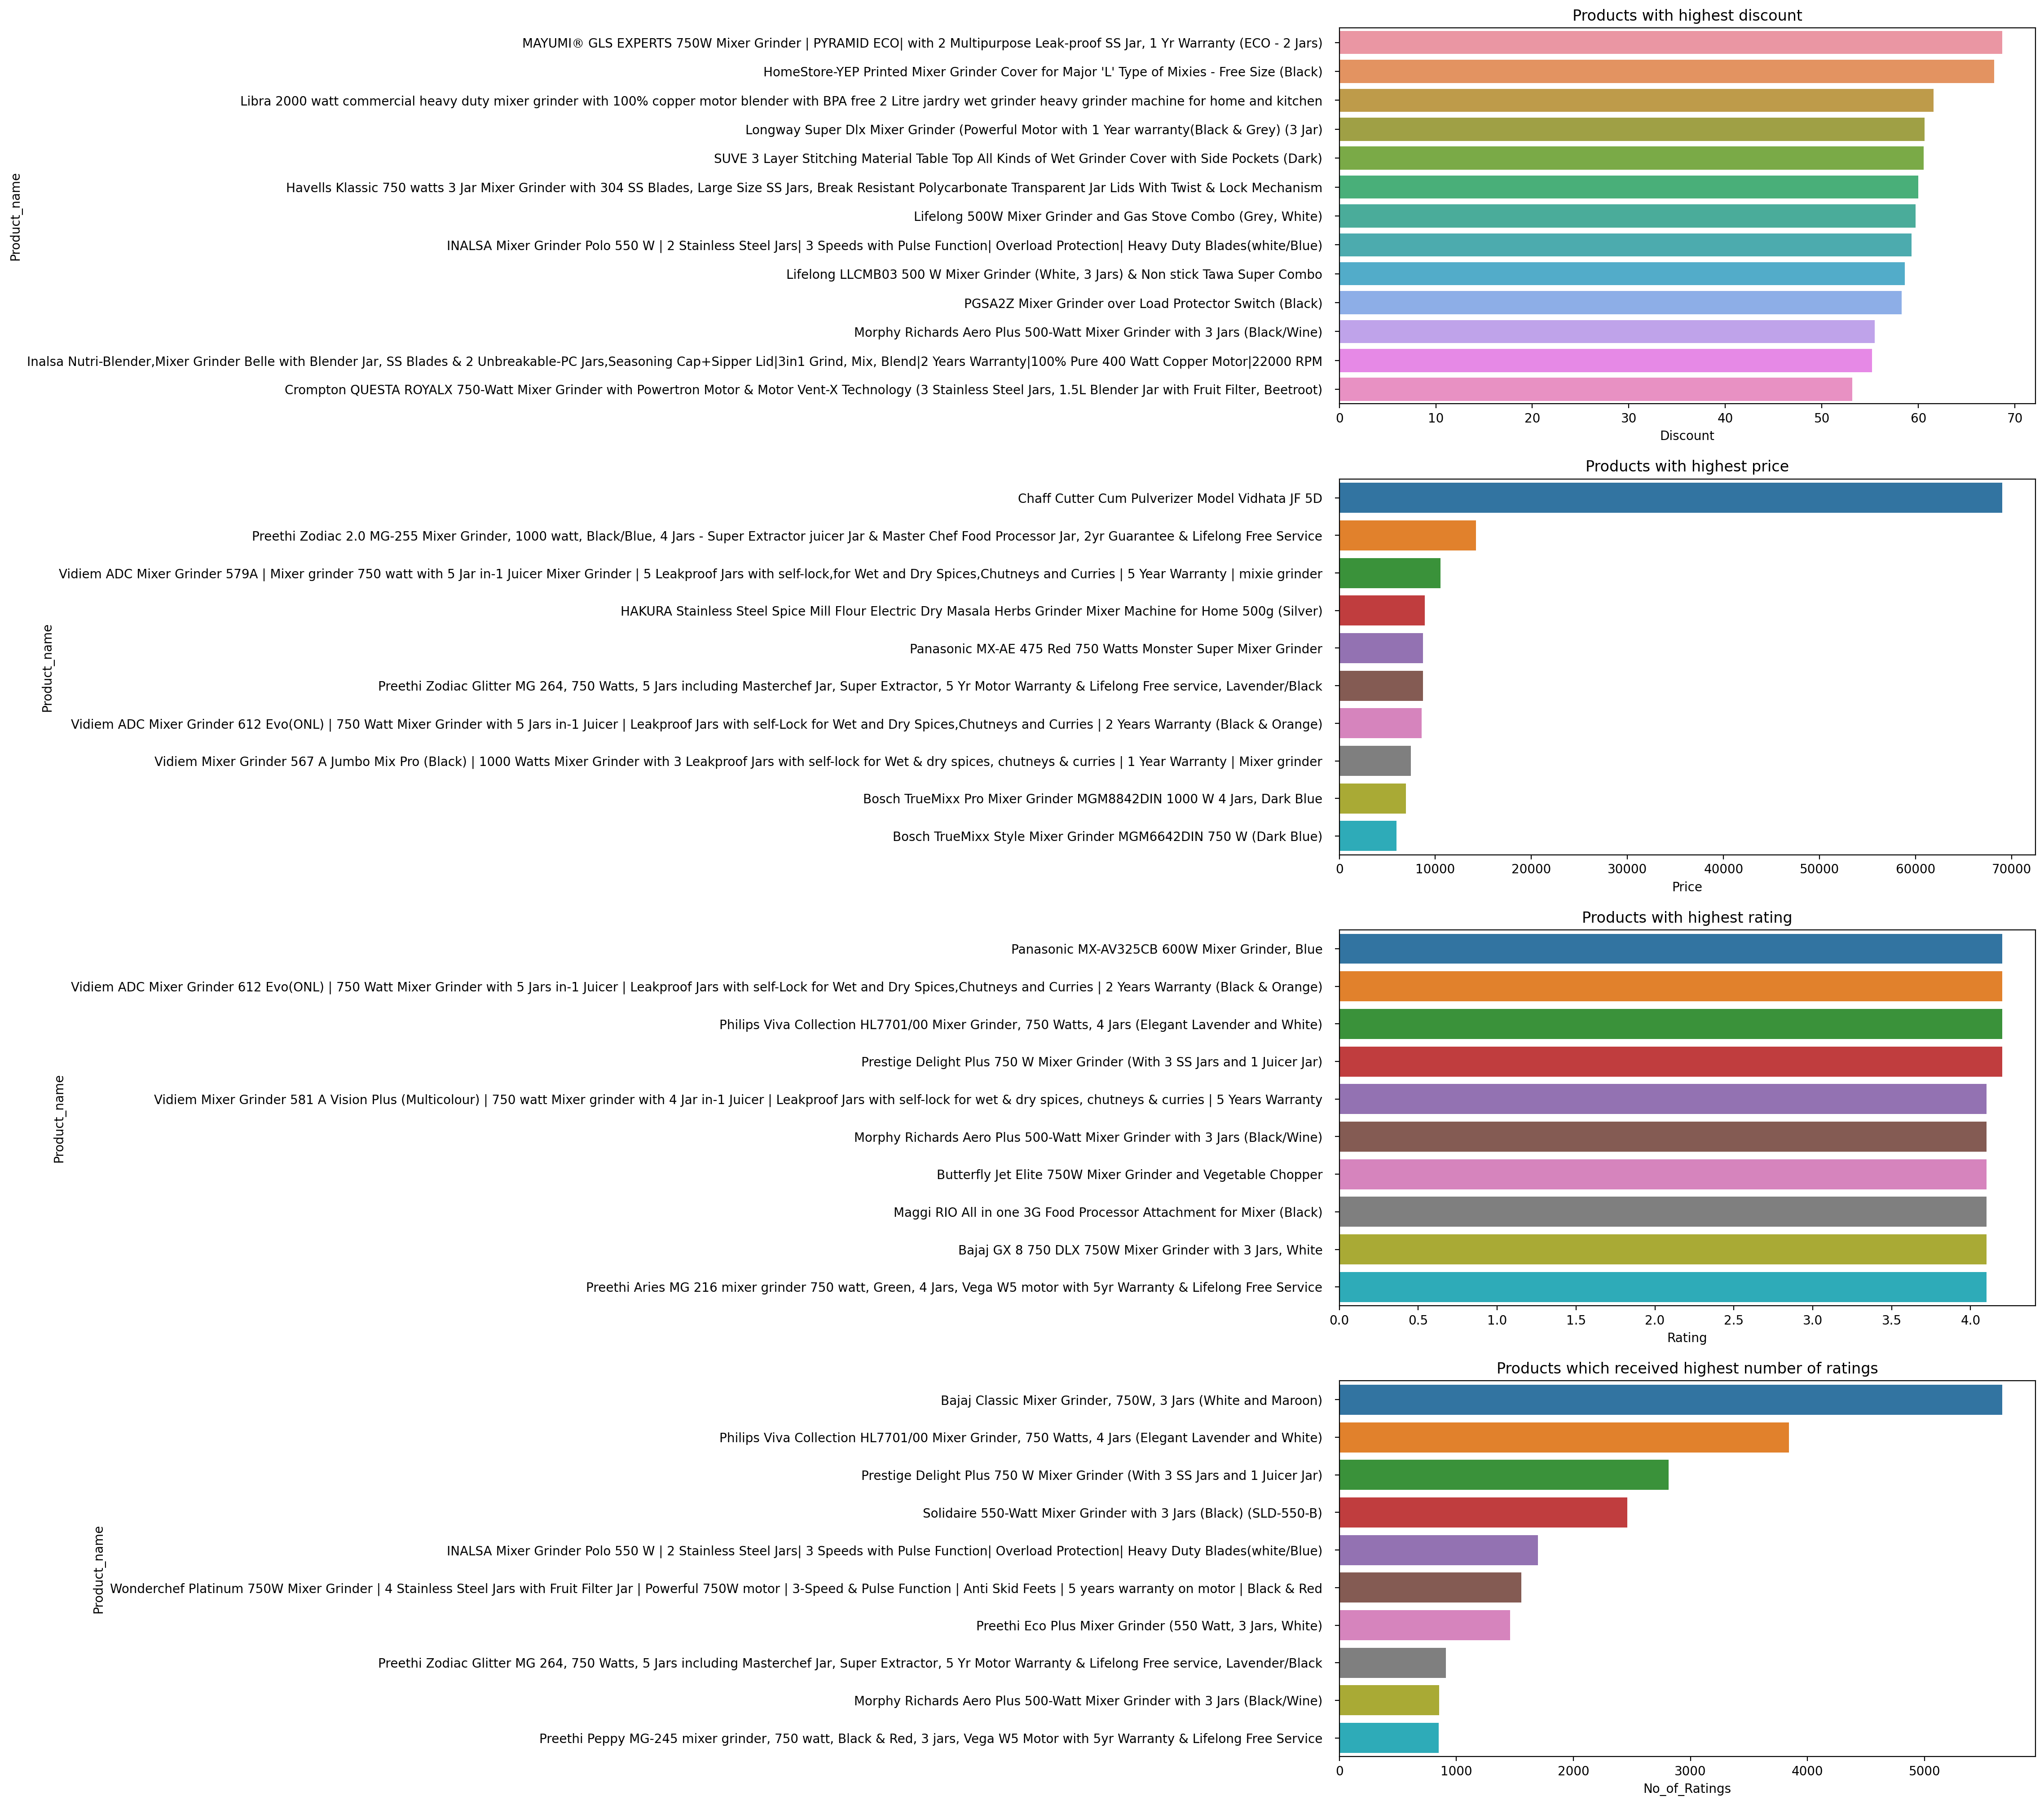

In [83]:
plt.figure(figsize=(10,25),dpi=200)

plt.subplot(4,1,1)
plt.title("Products with highest discount")
sns.barplot("Discount","Product_name",data=high_discount)

plt.subplot(4,1,2)
plt.title("Products with highest price")
sns.barplot("Price","Product_name",data=high_price)

plt.subplot(4,1,3)
plt.title("Products with highest rating")
sns.barplot("Rating","Product_name",data=high_rating)

plt.subplot(4,1,4)
plt.title("Products which received highest number of ratings")
sns.barplot("No_of_Ratings","Product_name",data=high_numrating)

## ==========================================================================

## Final Report on Analysis :

- On analysing the Mixer Grinders added in the Amazon website in the last 30 days we got the following conclusion


- Brand
  - 124 new Mixer Grinder  were added on to Amazon website by 69 brands in the past 30 days.
  - Preethi, Prestige, Sujata  Butterfly, Vidiem and Maharaja brands products are the most added ones.


- Discount
  - Longway Super Dlx 4 Jar 750 Watt Mixer Grinder is the highest discounted mixer grinder.
  - Shree RAM Traders Coupler for All Mixer Grinder is the highest discounted product.
  - Longway is the one brand which has 4 products with more than 50% dsicount.


- Price
  - IMPERIUM® Stainless Steel 4500Watt is the costliest product with a discounted price of 21499.
  - Shree RAM Traders Coupler for All Mixer Grinder is the chepaest product avaiable in the Mixer Grinder category.
 
 
- Rating and No_of_Ratings
  - Vidiem, Preethi, Prestige, Sujata, MK and Philips are the brands whose product got the highest rating of 4.2 stars.
  - Wonderchef Nutri-blend Juicer Mixer Grinder is the product which people rated the most.
  
 
  